# Manejo de Datos Basicos

In [16]:
# Ignore Recapitulacion

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev


# Abre el archivo de lectura
file = open("../../Archivos-Analisis/netflix_titles.csv",encoding='utf-8')

csvreader = csv.reader(file)

# Obtiene los encabezados del archivo (header)
header = []
header = next(csvreader)
header

# Extrae los datos a una lista
rows = []

for row in csvreader:
    rows.append(row)

# Generamos el objeto movies con todas las filas de la lista
movies = np.array(rows)
release_year = movies[:,7]

# Transformacion del array en numeros
release_year_int = [int(numeric_string) for numeric_string in release_year]
release_year_int [0:10]



[2020, 2021, 2021, 2021, 2021, 2021, 2021, 1993, 2021, 2021]

In [3]:
# Calculo de la media y desviacion estandar del arreglo
mean_year = mean(release_year_int)
stdev_year = stdev(release_year_int)
min_year = min(release_year_int)
max_year = max(release_year_int)

# Primer reporte estadistico de los datos
print("En promedio, el año en el que se generaron las peliculas del archivo es el ",int(mean_year))
print("Ademas, la desviacion estandar de los datos nos muestra que se tienen ", int(stdev_year))
print("El primer año que se muestra en los datos es", int(min_year))
print("El ultimo año que se muestra en los datos es", int(max_year))


En promedio, el año en el que se generaron las peliculas del archivo es el  2014
Ademas, la desviacion estandar de los datos nos muestra que se tienen  8
El primer año que se muestra en los datos es 1925
El ultimo año que se muestra en los datos es 2021


In [4]:
# No se si sera tan relevante saber el año promedio, pero si saber como hacerlo

In [5]:
# Trabajaremos con el campo de duracion
# Asignamos al array duration las duraciones de todas las peliculas
duration = movies[0:,9]

duration [0:10]

array(['90 min', '2 Seasons', '1 Season', '1 Season', '2 Seasons',
       '1 Season', '91 min', '125 min', '9 Seasons', '104 min'],
      dtype='<U771')

In [6]:
# Una definicion inicial, es que vamos a obtener nada mas informacion de peliculas, no de series
# Esto quiere decir que SOLAMENTE nos vamos a enfocar en las peliculas que terminen en "min"

# Obteniene las primeras diez peliculas que vienen en minutos
movies[np.char.endswith(movies, " min")][:9] # Numpy tiene un modulo, el cual tiene una funcion "endswith" para traer los datos que terminen con "min"

array(['90 min', '91 min', '125 min', '104 min', '127 min', '91 min',
       '67 min', '94 min', '161 min'], dtype='<U771')

In [7]:
# Generamos el array de las duraciones en minutos
duration_min = duration[np.char.endswith(duration, " min")]
duration_min

array(['90 min', '91 min', '125 min', ..., '88 min', '88 min', '111 min'],
      dtype='<U771')

In [8]:
# Una vez tenemos las peliculas en min, se convierte el registro a un numero, ej "90 min" a 90
# Esto se hace utilizanco la funcion "strip" de la libreria numpy (np.char)

# Eliminar la terminacion "min"
duration_min_end = np.char.strip(duration_min, " min")
# Trasformamos el array a numeros
duration_min_int = [int(numeric_string) for numeric_string in duration_min_end]

In [9]:
duration_min_int [0:9]

[90, 91, 125, 104, 127, 91, 67, 94, 161]

In [10]:
# Asi se obtiene un numero reporte estadistico, muchos mas interesantes

mean_movies = mean(duration_min_int)
stdev_movies = stdev(duration_min_int)
min_movies = min(duration_min_int)
max_movies = max(duration_min_int)

print("En promedio, la duracion de las peliculas del conjunto de datos es del",int(mean_movies),"minutos")
print("Ademas, la desviacion estandar de los datos nos muestra que se tiene", int(stdev_movies),"minutos")
print("La pelicula con menor duracion es de", int(min_movies),"minutos")
print("La pelicula con mayor duracion es de", int(max_movies),"minutos")

En promedio, la duracion de las peliculas del conjunto de datos es del 99 minutos
Ademas, la desviacion estandar de los datos nos muestra que se tiene 28 minutos
La pelicula con menor duracion es de 3 minutos
La pelicula con mayor duracion es de 312 minutos


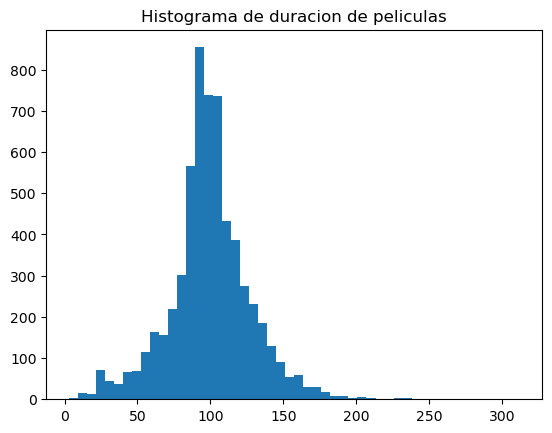

In [11]:
# Nuevo grafico
plt.title("Histograma de duracion de peliculas")
plt.hist(duration_min_int, bins=50)
plt.show()

In [12]:
# Que peliculas corresponden a la mas corta y a la ams larga?
# Tip: buscar por "3 min" y "312 min" en la base de datos original

# Filtro para la pelicula de 3 min
filter_arr = (duration == "3 min")
print(filter_arr)
dur_array3min = movies[filter_arr]
print(dur_array3min)

[False False False ... False False False]
[['s3778' 'Movie' 'Silent' 'Limbert Fabian, Brandon Oldenburg' ''
  'United States' 'June 4, 2019' '2014' 'TV-Y' '3 min'
  'Children & Family Movies, Sci-Fi & Fantasy'
  '"Silent" is an animated short film created by Academy Award® winning Moonbot Studios. It celebrates how storytellers, inventors, and technology work together to create cinema magic.']]


In [13]:
# Filtro para la pelicula de 312 min
filter_arr = (duration == "312 min")
print(filter_arr)
dur_array312min = movies[filter_arr]
print(dur_array312min)

[False False False ... False False False]
[['s4254' 'Movie' 'Black Mirror: Bandersnatch' ''
  'Fionn Whitehead, Will Poulter, Craig Parkinson, Alice Lowe, Asim Chaudhry'
  'United States' 'December 28, 2018' '2018' 'TV-MA' '312 min'
  'Dramas, International Movies, Sci-Fi & Fantasy'
  'In 1984, a young programmer begins to question reality as he adapts a dark fantasy novel into a video game. A mind-bending tale with multiple endings.']]


In [14]:
# Para ver el nombre solamente de la pelicula mediante el uso de su identificador
print(movies[3777][2])
print(movies[4253][2])

Silent
Black Mirror: Bandersnatch
